<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_18_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install scikeras

In [67]:
!pip install --upgrade scikit-learn scikeras

In [68]:
!pip install keras

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv('/content/Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


EDA

In [71]:
df.shape

(20000, 17)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [73]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [74]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [75]:
df.iloc[:, -1].value_counts()

,count
yedgex,
8,8047
7,3472
9,2358
6,1827
10,1578
5,992
11,868
4,478
12,137


In [76]:
df.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


Preprocessing

In [77]:
df_numeric = df.select_dtypes(include=[np.number])

In [78]:
X = df_numeric.iloc[:, :-1].values

Label encode target if it's categorical

In [79]:
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

X = df_encoded.iloc[:, :-1].values
y = df_encoded.iloc[:, -1].values

In [80]:
le = LabelEncoder()
y = le.fit_transform(y)


Normalize features

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train_test_Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Build ANN Model

In [83]:
def build_model(optimizer='adam', activation='relu', neurons=32,**kwarga):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [84]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV



hyperparameter

KerasClassifier with scikeras

In [85]:
clf = KerasClassifier(model=build_model, epochs=5, batch_size=32, verbose=0)

Grid

Hyperparameter Tuning

In [86]:
param_grid = {
    'model__neurons': [32, 64],
    'model__activation': ['relu'],
    'model__optimizer': ['adam']
}

grid = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid_result=grid.fit(X_train, y_train)

In [87]:
print("Best Parameters:", grid_result.best_params_)

Best Parameters: {'model__activation': 'relu', 'model__neurons': 64, 'model__optimizer': 'adam'}


Best Model

In [88]:
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)


Accuracy

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.59375


Classification

In [90]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        26
           4       0.58      0.29      0.39        96
           5       0.39      0.43      0.41       198
           6       0.50      0.45      0.48       365
           7       0.53      0.40      0.45       694
           8       0.71      0.85      0.77      1610
           9       0.47      0.46      0.46       472
          10       0.51      0.45      0.48       316
          11       0.45      0.52      0.48       174
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         3

    accuracy                           0.59      4000
   macro avg       0.30      0.27      0.28      4000
weighted avg       0.57      0.59      0.58      4000



Plotting Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
target_names = le.inverse_transform(np.unique(y_test))

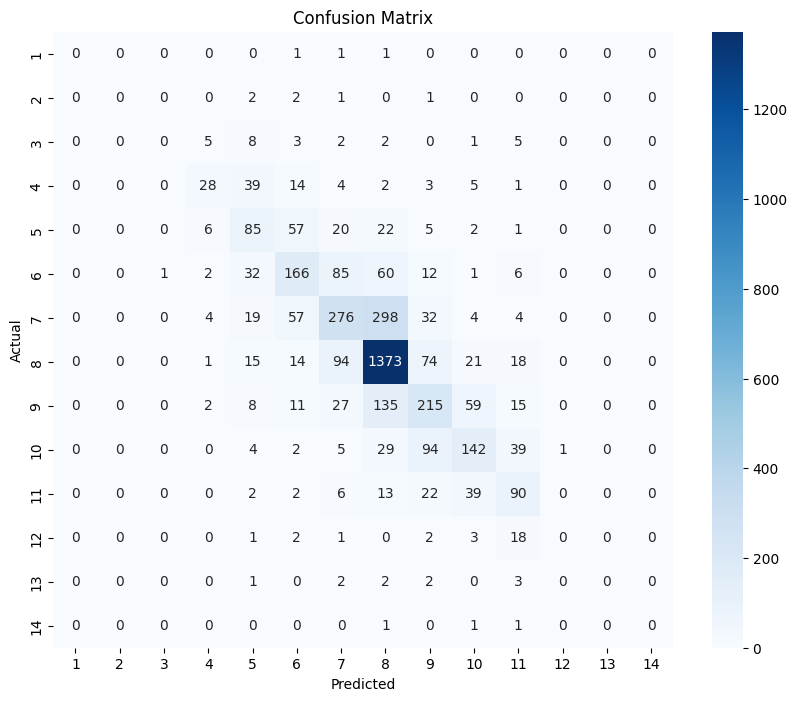

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()